In [ ]:
from diffusers import StableDiffusionInpaintPipeline
from peft import PeftModel
from PIL import Image
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# # === Load base inpainting pipeline ===
# pipe = StableDiffusionInpaintPipeline.from_pretrained(
#     "runwayml/stable-diffusion-inpainting",
#     torch_dtype=torch.float32,
#     safety_checker=None
# ).to("cuda")



In [ ]:
from google.colab import files
import zipfile
import os

# Upload ZIP file (zip your LoRA folder before this)
uploaded = files.upload()  # Choose the .zip file containing the LoRA weights


Saving lora_inpainting_weights.zip to lora_inpainting_weights.zip


In [ ]:
with zipfile.ZipFile("lora_inpainting_weights.zip", 'r') as zip_ref:
    zip_ref.extractall("lora_weights")


In [ ]:
import torch
torch.cuda.empty_cache()

# If needed, restart runtime before this block
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float32,
    safety_checker=None
).to("cuda")  # This should now work


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'diffusers.pipelin

In [ ]:
import torch
from safetensors.torch import load_file

# Load safetensor weights
weights = load_file("/content/lora_weights/adapter_model.safetensors")

# Load weights manually into the model
pipe.unet.load_state_dict(weights, strict=False)


_IncompatibleKeys(missing_keys=['conv_in.weight', 'conv_in.bias', 'time_embedding.linear_1.weight', 'time_embedding.linear_1.bias', 'time_embedding.linear_2.weight', 'time_embedding.linear_2.bias', 'down_blocks.0.attentions.0.norm.weight', 'down_blocks.0.attentions.0.norm.bias', 'down_blocks.0.attentions.0.proj_in.weight', 'down_blocks.0.attentions.0.proj_in.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.norm1.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.norm1.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.bias', 'down_blocks.0.attentions.0.transformer_blocks.0.norm2.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.norm2.bias', 'down_blocks.0.attentions.0.t

In [ ]:
from google.colab import files
from PIL import Image

# Upload image
uploaded = files.upload()

# Get image path
for filename in uploaded.keys():
    image_path = filename
    break

# Open and show image
image = Image.open(image_path).convert("RGB").resize((512, 512))
image.show()


Saving WhatsApp Image 2025-08-05 at 16.11.22.jpeg to WhatsApp Image 2025-08-05 at 16.11.22.jpeg


In [ ]:
import cv2
import numpy as np
from PIL import Image

def generate_statue_mask(image_pil):
    # Convert PIL to OpenCV format
    image = np.array(image_pil.convert("RGB"))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Step 1: Edge detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)

    # Step 2: Morphological operations to close gaps
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    # Step 3: Threshold to get binary mask
    _, mask = cv2.threshold(closed, 25, 255, cv2.THRESH_BINARY)

    # Optional: convert to PIL Image
    mask_pil = Image.fromarray(mask).convert("L")
    return mask_pil


In [ ]:
from PIL import Image

# Load uploaded image
image = Image.open("/content/girl.jpeg").convert("RGB")

# Generate broken parts mask
your_mask = generate_statue_mask(image)

# Show mask
your_mask.show()


In [ ]:
result = pipe(
    prompt = "face of a classical marble statue, delicate features, weathered stone",
    image=image,
    mask_image=your_mask,
    num_inference_steps=50,
    guidance_scale=7.5,
).images[0]

result.show()


  0%|          | 0/50 [00:00<?, ?it/s]

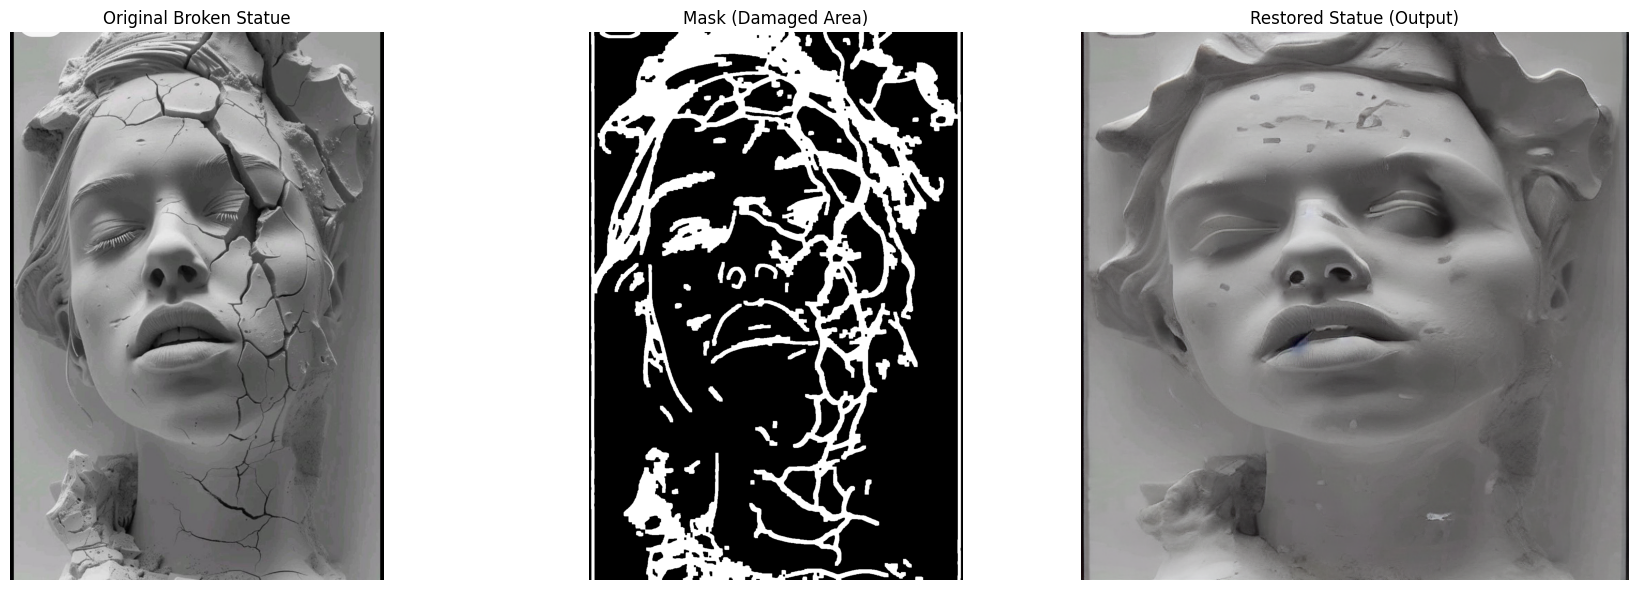

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have:
# - image (original PIL image)
# - mask_image (PIL grayscale mask)
# - result (final inpainted image from pipe)

plt.figure(figsize=(18, 6))

# Original
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Broken Statue")
plt.axis("off")

# Masked Image
plt.subplot(1, 3, 2)
plt.imshow(your_mask, cmap="gray")
plt.title("Mask (Damaged Area)")
plt.axis("off")

# Restored Result
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.title("Restored Statue (Output)")
plt.axis("off")

plt.tight_layout()
plt.show()

